In [1]:
import pandas as pd
import re
from scipy.signal import correlate
import numpy as np
import sys
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\src')
import time
from sklearn.manifold import TSNE
from sklearn.cluster import OPTICS
import os
from APTamers import  Aptamer_Fold
from tqdm import tqdm
from utils import check_char, check_if_string, check_structure, check_empty_or_short, find_substrings,  attach_stems
import pandas as pd
import forgi.visual.mplotlib as fvm
import forgi
import RNA
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import SpectralClustering
from seqfold import fold, dg, dg_cache, dot_bracket


from typing import Any, Dict, Tuple
import sys
import os

# Example path you want to add
new_path = r'../src/'
# Check if the path already exists to avoid duplication
if new_path not in sys.path:
    sys.path.append(new_path)
    
from Types import Comp, MultiBranch, BpEnergy, LoopEnergy, Energies
from dna import DNA_ENERGIES
from substructures import substructure_ID
from energy_functions import _hairpin, _stack, _bulge, _internal_loop, _multi_branch, compute_energy
emap = DNA_ENERGIES

In [2]:
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\preprocessed _files\UNAfold_merged_all.csv')
print('Numeber sequences after merge:',len(df))
df = df.drop_duplicates(subset='Sequence')
print('Numeber of unique sequences after preprocessing:',len(df))


Numeber sequences after merge: 4933
Numeber of unique sequences after preprocessing: 4933


In [3]:
i = 0
structs = fold( df['Sequence'][i])
# -13.4, same as dg()
# `dot_bracket` returns a dot_bracket representation of the folding
d_b = dot_bracket( df['Sequence'][i], structs)
e = compute_energy(df['Sequence'][i], d_b )
   
print(round(sum(s.e for s in structs),5), round(e,5))

-9.0 -9.0


In [4]:

APT = Aptamer_Fold(parallel = False)
d = APT.fit_fold( sequence=df['Sequence'][0] ,  n_tmpl=4, l_fix= 0 , filters = False)

In [5]:
d

['(((.((((....(((...))).((.............)).....)))).)))']

In [13]:
df['Sequence'][0]

'GGGACGACGGGGCACATTGTGCTGTTCATCTGTTCCGCAGGAGAGTCGTCCC'

In [10]:
d

'(((.((((....(((...))).((.............)).....)))).)))'

In [6]:
d_b

'((((((((....(((...))).............((...))...))))))))'

In [7]:
for s in structs:
        if len(s.ij) == 1:
            print( s.ij[0])

(0, 51)
(1, 50)
(2, 49)
(3, 48)
(4, 47)
(5, 46)
(6, 45)
(7, 44)
(12, 20)
(13, 19)
(14, 18)
(34, 40)
(35, 39)


In [13]:
APT.motifs[0]

[(0, 35), (1, 34)]

In [7]:
APT.maximal_sets

[[0, 6, 17, 21, 26, 31, 39, 42, 45, 53, 62, 68],
 [1, 6, 16, 23, 39, 46, 51, 65, 70, 72],
 [2, 4, 10, 15, 17, 21, 26, 30, 39, 42, 45, 53, 62, 63],
 [3, 8, 17, 21, 26, 31, 39, 42, 45, 53, 62, 63],
 [5, 11, 18, 28, 30, 39, 46, 51, 65, 70, 79],
 [7, 0, 17, 21, 26, 31, 39, 42, 45, 62, 63],
 [9, 0, 14, 18, 31, 39, 42, 45, 53, 62, 68],
 [12, 0, 18, 29, 34, 39, 42, 45, 53, 67, 70],
 [13, 0, 18, 29, 34, 39, 42, 45, 53, 62, 68],
 [19, 0, 6, 29, 34, 39, 42, 45, 62],
 [20, 1, 6, 28, 39, 42, 45, 53, 62, 68],
 [22, 0, 6, 27, 29, 35, 39, 42, 45, 53, 62, 68],
 [24, 0, 6, 17, 31, 39, 42, 45, 53, 67, 70],
 [25, 0, 6, 17, 31, 39, 42, 45, 53, 62, 68],
 [32, 0, 6, 17, 21, 26, 34, 39, 42, 45, 53, 62, 68],
 [33, 1, 6, 17, 21, 26, 39, 42, 45, 53, 62, 68],
 [36, 1, 6, 17, 21, 26, 41, 50, 59, 62, 65],
 [37, 0, 6, 17, 21, 26, 35, 41, 50, 59, 62, 65],
 [38, 0, 6, 17, 21, 26, 41, 50, 59, 62, 65, 79],
 [40, 0, 6, 17, 21, 26, 31, 45, 53, 59, 68],
 [43, 0, 6, 17, 21, 26, 31, 50, 55, 65],
 [44, 0, 6, 17, 21, 26, 31, 

In [12]:
for count, i in enumerate(APT.maximal_sets):
    if 2 in i:
        print(count)

2


In [11]:
for i in APT.maximal_sets[2]:
    print(APT.compatible(APT.motifs[73], APT.motifs[i]))

True
True
True
True
True
True
True
False
True
True
True
True
True
False


In [34]:
APT.motifs.index([(34,40), (35, 39)])

73

In [ ]:
s

In [6]:
times_a = []

for i, seq in tqdm(enumerate(df['Sequence'])):
    APT = Aptamer_Fold(parallel = False)
    start_time = time.time()
    d = APT.fit_fold( sequence=df['Sequence'][i] ,  n_tmpl=4, l_fix= 0 , filters = False)
    times_a.append(time.time()- start_time)
    
    

0it [00:00, ?it/s]

[0, 6, 23]
[1, 6, 23]
[2, 4, 10, 15, 17, 21, 26, 30, 39, 41]
[3, 8, 18, 39, 41]
[5, 11]
[7, 0, 18, 39, 41]
[9, 1, 14, 18, 39, 41]
[12, 0, 23]
[13, 0, 18, 39, 41]
[16, 1, 9, 23]
[19, 0, 13, 39, 41]
[20, 1, 9, 14, 39, 41]
[22, 2, 27, 29, 33, 39, 41]
[24, 0, 6, 39, 41]
[25, 0, 39, 41]
[28, 1, 9, 14, 30, 39, 41]
[31, 36, 41]
[32, 34, 39, 41]
[35, 37, 41]
[38, 41]
[40, 1, 9, 14, 44, 48]
[42, 0, 6]
[43, 0, 48]
[45, 0, 49, 51]
[46, 1, 15, 17, 50]
[47, 1, 50]
[52, 1, 9, 14, 53]
[54, 1, 9, 14, 55]
[56, 1, 9, 14, 59]
[57, 1, 9, 14, 64, 67]
[58, 1, 9, 60, 64, 67]
[61, 1, 9, 14, 62, 67]
[63, 1, 9, 14, 65]
[66, 1, 9, 68]
[69, 1, 9, 14]


1it [00:02,  2.50s/it]

[70, 1]
[71, 73]
[72, 74]
[0]
[1]
[2, 10, 26, 30]
[3, 10, 26, 30]
[4, 8, 14, 18, 20, 24, 28, 31, 33, 39, 41, 42, 47]


1it [00:04,  4.34s/it]


KeyboardInterrupt: 

In [ ]:
times_b = []
for i, seq in tqdm(enumerate(df['Sequence'])):
    start_time = time.time()
    structs = fold( seq)
    times_b.append(time.time()- start_time)

53it [00:11,  4.73it/s]


KeyboardInterrupt: 

In [ ]:
APT = Aptamer_Fold()
d = APT.fit_fold( sequence=df['Sequence'][i] ,  n_tmpl=4, l_fix= 0 , filters = False)

In [ ]:
d

'(((.((((....................................)))).)))'

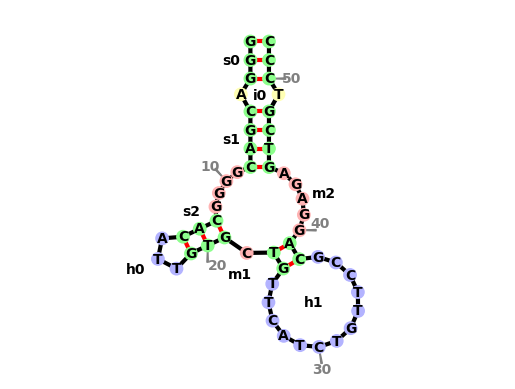

In [12]:
bg = BulgeGraph.from_dotbracket( d ,  df['Sequence'][0] )

fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [ ]:
import RNA

def compute_dna_energy(sequence, structure):
    """
    Compute the free energy of a given DNA sequence and its dot-bracket structure using ViennaRNA package
    with DNA folding parameters.
    
    Args:
    sequence (str): DNA sequence.
    structure (str): Dot-bracket structure of the DNA sequence.
    
    Returns:
    float: Free energy of the given structure.
    """
    # RNA package initialization with DNA parameters
    md = RNA.md()
    md.temperature = 37.0  # Set to default temperature (37°C) for DNA
    md.dangles = 2         # Use default dangling end options
    md.noLP = 0            # No lonely pairs
    md.noGU = 1            # DNA doesn't form GU pairs
    md.energy_set = 1      # Use DNA parameters
    
    # Create a fold compound with the specified model details
    fc = RNA.fold_compound(sequence, md)
    
    # Calculate the free energy of the provided structure
    energy = fc.eval_structure(structure)
    
    return energy


# Example usage
sequence = df['Sequence'][i] 
structure = d_b

energy = compute_energy(sequence, structure)
print(f"Free energy of the structure: {energy} kcal/mol")


In [ ]:
d_b

In [ ]:
stru

In [ ]:
for s in structs:
    print(s)
    

In [ ]:
from seqfold import fold, dg, dg_cache, dot_bracket

non_work = []
# just returns minimum free energy
for i in  tqdm(range(200)):
# `fold` returns a list of `seqfold.Struct` from the minimum free energy structure
    structs = fold( df['Sequence'][i])
    # -13.4, same as dg()
    # `dot_bracket` returns a dot_bracket representation of the folding
    d_b = dot_bracket( df['Sequence'][i], structs)
    e, stru= compute_energy(df['Sequence'][i], d_b )
    if round(sum(s.e for s in structs),5) != round(e,5):
        non_work.append(i)
        #print(round(sum(s.e for s in structs),5), round(e,5))
        print(i)
        

In [ ]:
stru

In [ ]:
def compute_descriptor(input_string):
    descriptor = []
    sum = 0
    for count, char in enumerate(input_string):
        if char == '(':
            sum +=1
            descriptor.append(sum)
        elif char == ')':
            descriptor.append(sum)
            sum -= 1
        elif char == '.':
            descriptor.append(sum)      
    return descriptor


def substructure_ID(string):
    w= compute_descriptor(string)
   
    mask = np.isin( np.array(list(string)), ['(', ')'])
    p = mask.astype(int)
    
    dct = {'hairpins' : [],
    'multi-branches' : [],
    'stacks' : [],
    'left_bulges' : [],
    'right_bulges' : [],
    'inner_loops' : [] }
    
    stacks = []
    for count, s in enumerate(string):
        #print(stacks)
        if s == '(':
            stacks.append(count)
            
        elif s == ')':
            if stacks:
                i = stacks.pop()
                j = count
            
            if w[i]==w[i+1]-1 and w[j]==w[j-1]-1:
                dct['stacks'].append((i,j))
                
            else:
                l = w[i]
                
                L = np.where(np.logical_and(np.array(w[i:j], dtype = int)== l+1 , np.array(p[i:j])==1  ))[0] + i
              
                #print(l, w)
                #print(string[i:j])
                print('ala',w[i],w[i:j])
                T = int(len(L)/2)
                print(len(L))
                if T == 0 and np.abs(i-j)>=4:
                    print('hairpin')
                    dct['hairpins'].append((i,j))
                elif T == 1:
                    print('Inner')
                    #print(L)
                    stat = [i, L[0], L[1],j]
                    print(stat)
                    if w[i]==w[i+1]-1 and w[j]!=w[j-1]-1: #right buldge
                        dct['right_bulges'].append([(stat[k], stat[k-1]) for k in range(2)]) #[(i, j), (i1,j1)]
                        #dct['right_buldges'].append((i,j))
                    elif w[i]!=w[i+1]-1 and w[j]==w[j-1]-1: #left buldge
                        dct['left_bulges'].append([(stat[k], stat[-k-1]) for k in range(2)])#[(i, j), (i1,j1)]
                        #dct['left_buldges'].append((i,j))
                    else:
                        dct['inner_loops'].append([(stat[k], stat[-k-1]) for k in range(2)])#[(i, j), (i1,j1)]
                        #dct['inner_loops'].append((i,j))
                elif T > 1:
                    #print(l+1,w[i:j])
                    stat = [i, j] + list(L) 
                    #TODO return coorect stuff
                    
                    print('multi', L)
                    dct['multi-branches'].append( [(stat[2*k], stat[2*k+1]) for k in range(T+1)]  )
                    
                
    return dct


In [ ]:
branches = dct['multi-branches']
branches[0]

In [ ]:
compute_energy(df['Sequence'][1], df['Structure_UNA'][1] )

In [ ]:
bg = BulgeGraph.from_dotbracket( df['Structure_UNA'][0] ,  df['Sequence'][1] )

fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [ ]:
_hairpin(df['Sequence'][0], 14, 18, 37,  emap )

In [ ]:
_stack(df['Sequence'][0], 13, 14, 19, 18, 37, emap) 

In [ ]:
_bulge( df['Sequence'][1], 9,21, 42, 41,37, emap)

In [ ]:
_internal_loop(df['Sequence'][1], 26, 28, 42, 40, 37, emap)

In [ ]:
_multi_branch(df['Sequence'][2], 37 ,branches[0], emap)


In [ ]:
plt.plot(np.arange(len(df['Structure_UNA'][0])), compute_descriptor(df['Structure_UNA'][0]))

In [ ]:

'((((((((....(((...))).............((...))...))))))))'

In [ ]:
bg = BulgeGraph.from_dotbracket( df['Structure_UNA'][3] ,  df['Sequence'][3] )

fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

dct = substructure_ID(df['Structure_UNA'][100])
print(dct)

In [ ]:
seqs = Aptamer_Fold().fit_fold(sequence= df['Sequence'][0],  n_tmpl=4, l_fix=8 ,  return_min = False, filters = False)
bg = BulgeGraph.from_dotbracket( df['Structure_UNA'][0] ,  df['Sequence'][0] )

fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

bg = BulgeGraph.from_dotbracket( df['Structure_UNA'][1] ,  df['Sequence'][1] )

fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [ ]:
percentile_95 = np.percentile(df['Sequence'].apply(len), 95) 
percentile_3 = np.percentile(df['Sequence'].apply(len), 5)
# Filter DataFrame to remove rows with list lengths outside the 95th percentile
df = df[df['Sequence'].apply(len).between(0, np.ceil(percentile_95))]
df = df[df['Sequence'].apply(len) > np.floor(percentile_3)]

In [ ]:
def compute_descriptor(input_string):
    descriptor = []
    sum = 0
    for  char in input_string:
        if char == '(':
            sum +=1
            descriptor.append(sum)
        elif char == ')':
            sum -=1 
            descriptor.append(sum)
        elif char == '.':
            descriptor.append(sum)      
    return descriptor


def dna_descriptor(sequence, n_max):
    # Create an array of zeros with the same length as the sequence
    complete_descriptor = []
    for l in ['A', 'C', 'T', 'G']:
        descriptor = np.zeros(len(sequence), dtype=int)
        descriptor[ np.where(np.array(list(sequence)) == l)[0]] = 1
        
        complete_descriptor +=descriptor.tolist()
        complete_descriptor+=np.zeros(n_max -len(sequence), dtype=int).tolist()
    return np.asarray(complete_descriptor)

In [ ]:

df['Descriptor'] = df['Structure_UNA'].apply(lambda x: compute_descriptor(x) )
df['Descriptor'] = df['Descriptor'] .apply(lambda x: np.array(x))
# Determine the maximum length of the lists
max_length = df['Descriptor'].apply(len).max()

# Convert the lists column into a numpy array with padding
X = np.zeros((len(df), max_length*5), dtype=int)
for i, row in enumerate(df['Descriptor']):
    X[i, :len(row)] = row
    X[i,max_length:] = dna_descriptor(df['Sequence'][0],max_length)

In [ ]:


idx = df['Count'] >= 1000
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, perplexity=3).fit_transform(X)

X_embedded = X_embedded
colors =np.log(df['Count'])
plt.scatter(X_embedded[::-1,0], X_embedded[::-1,1],c=colors[::-1], cmap='viridis')
#plt.scatter(X_embedded[idx,0], X_embedded[idx,1])
plt.colorbar(label='Count')
plt.show()



X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, perplexity=50).fit_transform(X)
X_embedded = X_embedded
colors =np.log(df['Count'])
plt.scatter(X_embedded[::-1,0], X_embedded[::-1,1],c=colors [::-1], cmap='viridis')

plt.colorbar(label='Count')
plt.show()

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, perplexity=120).fit_transform(X)
X_embedded = X_embedded
colors =np.log(df['Count'])
plt.scatter(X_embedded[::-1,0], X_embedded[::-1,1],c=colors[::-1], cmap='viridis')
#plt.scatter(X_embedded[idx,0], X_embedded[idx,1])
plt.colorbar(label='Count')
plt.show()








In [ ]:


df['Descriptor'] = df['Structure_graph_match'].apply(lambda x: compute_descriptor(x) )
df['Descriptor'] = df['Descriptor'] .apply(lambda x: np.array(x[8:-8]))

# Determine the maximum length of the lists
max_length = df['Descriptor'].apply(len).max()

# Convert the lists column into a numpy array with padding
X = np.zeros((len(df), max_length), dtype=int)
for i, row in enumerate(df['Descriptor']):
    X[i, :len(row)] = row

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, perplexity=3).fit_transform(X)
plt.scatter(X_embedded[::-1,0], X_embedded[::-1,1],c=df['Count'][::-1], cmap='viridis')
plt.colorbar(label='Count')
plt.show()

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, perplexity=30).fit_transform(X)
plt.scatter(X_embedded[::-1,0], X_embedded[::-1,1],c=df['Count'][::-1], cmap='viridis')
plt.colorbar(label='Count')
plt.show()



In [ ]:



df['Descriptor'] = df['Structure_RNA'].apply(lambda x: compute_descriptor(x) )
df['Descriptor'] = df['Descriptor'] .apply(lambda x: np.array(x[8:-8]))
# Determine the maximum length of the lists
max_length = df['Descriptor'].apply(len).max()

# Convert the lists column into a numpy array with padding
X = np.zeros((len(df), max_length), dtype=int)
for i, row in enumerate(df['Descriptor']):
    X[i, :len(row)] = row

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, perplexity=3).fit_transform(X)
plt.scatter(X_embedded[::-1,0], X_embedded[::-1,1],c=df['Count'][::-1], cmap='viridis')
plt.colorbar(label='Count')
plt.show()

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, perplexity=30).fit_transform(X)
plt.scatter(X_embedded[::-1,0], X_embedded[::-1,1],c=df['Count'][::-1], cmap='viridis')
plt.colorbar(label='Count')
plt.show()


In [ ]:
'''
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\preprocessed _files\merged_all.csv')
print('Numeber sequences after merge:',len(df))
df = df.drop_duplicates(subset='Sequence')
print('Numeber of unique sequences after merge:',len(df))


def predict_secondary_structure(sequence):
    structs = fold(sequence)
    return dot_bracket(sequence, structs)

start = time.time()
df['Structure_UNA'] = df['Sequence'].apply(lambda x: predict_secondary_structure(x))
print(time.time()- start) 
df= df.dropna(subset=['Structure_UNA'])
df.to_csv('UNAfold_merged_all.csv', index=False)

start = time.time()
APT = Aptamer_Fold()

df['Structure_graph_match'] = df['Sequence'].apply(lambda x: Aptamer_Fold().fit_fold(sequence= x,  n_tmpl=4, l_fix=8 , filters = False))
print(time.time()- start) 
df= df.dropna(subset=['Structure_graph_match'])
'''